In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# import module
import pandas as pd
  
# assign dataset names
list_of_names = ['trafficData158324','trafficData158355','trafficData158386']
  
# create empty list
dataframes_list = []
  
# append datasets into teh list
for i in range(len(list_of_names)):
    df = pd.read_csv(list_of_names[i]+".csv",parse_dates=True, index_col='TIMESTAMP')
    dataframes_list.append(df)
df_final = pd.concat(dataframes_list)
df_final.shape

(92845, 8)

In [3]:
df_final = df_final.replace(to_replace = 668, value =1)

In [4]:
df_final = df_final.replace(to_replace = 690, value =2)

In [5]:
df_final = df_final.replace(to_replace = 925, value =3)

In [6]:
# extract year from date
df_final['Year'] = pd.Series(df_final.index).apply(lambda x: x.year).to_list()

# extract month from date
df_final['Month'] = pd.Series(df_final.index).apply(lambda x: x.month).to_list()

# extract day from date
df_final['Day'] = pd.Series(df_final.index).apply(lambda x: x.day).to_list()

# extract hour from date
df_final['Hour'] = pd.Series(df_final.index).apply(lambda x: x.hour).to_list()

# extract weekday from date
df_final['weekday'] = pd.Series(df_final.index).apply(lambda x: x.weekday()).to_list()

In [7]:
df_final.drop('_id', axis=1, inplace=True)
df_final.drop('status', axis=1, inplace=True)
df_final.drop('avgMeasuredTime', axis=1, inplace=True)
df_final.drop('avgSpeed', axis=1, inplace=True)
df_final.drop('medianMeasuredTime', axis=1, inplace=True)
df_final.drop('REPORT_ID', axis=1, inplace=True)

In [8]:
df_final.head()

,extID,vehicleCount,Year,Month,Day,Hour,weekday
TIMESTAMP,,,,,,,
2014-02-13 11:30:00,1,7,2014,2,13,11,3
2014-02-13 11:35:00,1,5,2014,2,13,11,3
2014-02-13 11:40:00,1,6,2014,2,13,11,3
2014-02-13 11:45:00,1,3,2014,2,13,11,3
2014-02-13 11:50:00,1,6,2014,2,13,11,3


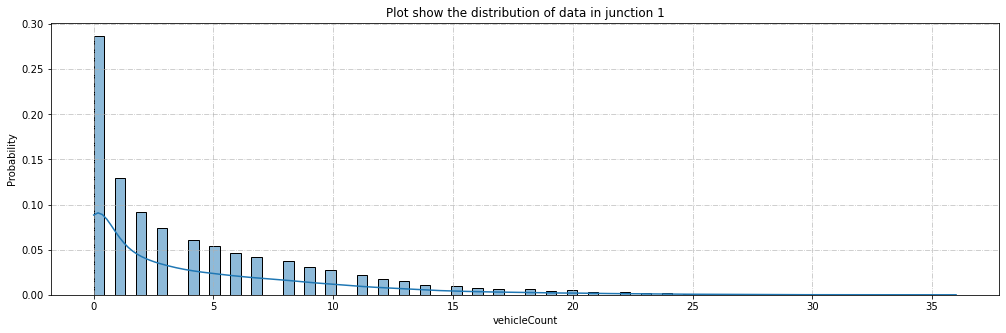

In [9]:
def make_hist(extID=1):
    data = df_final[df_final['extID'] == extID]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['vehicleCount'], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in junction {extID}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()
make_hist(1)

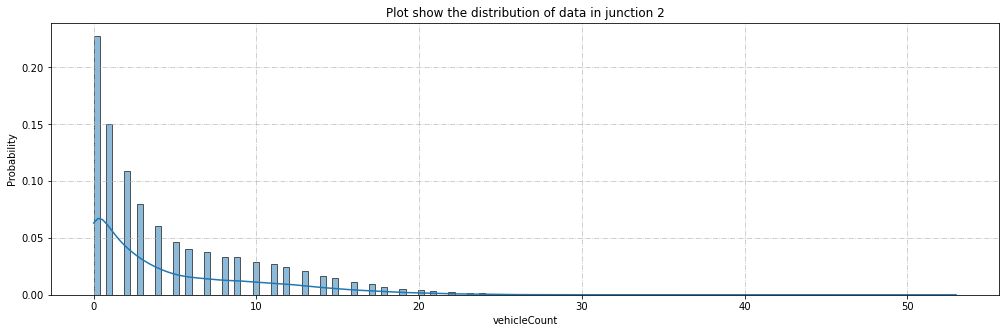

In [10]:
make_hist(2)

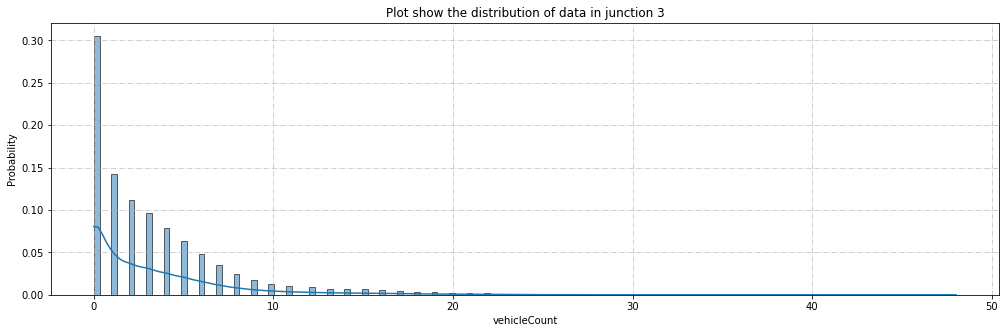

In [11]:
make_hist(3)

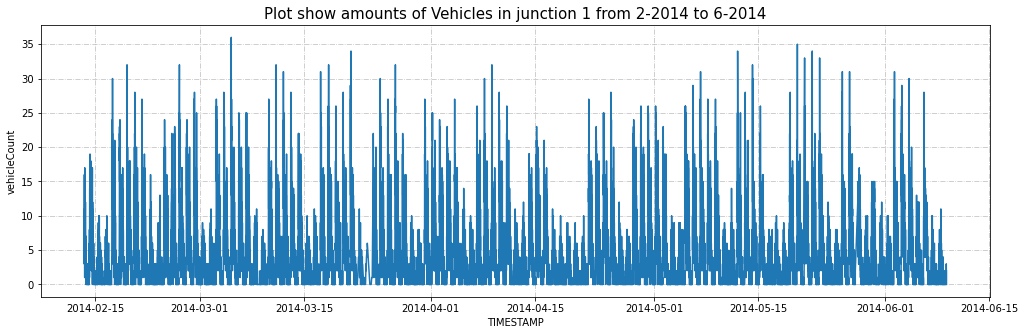

In [12]:
def make_time_series_plot(extID=1):
    f, ax = plt.subplots(figsize=(17, 5))
    data=df_final[df_final['extID'] == extID]
    ax = sns.lineplot(data=data, y='vehicleCount', x='TIMESTAMP', ax=ax)
    start = data.head(1)
    end = data.tail(1)
    ax.set_title(f'Plot show amounts of Vehicles in junction {extID} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()
make_time_series_plot(extID=1)

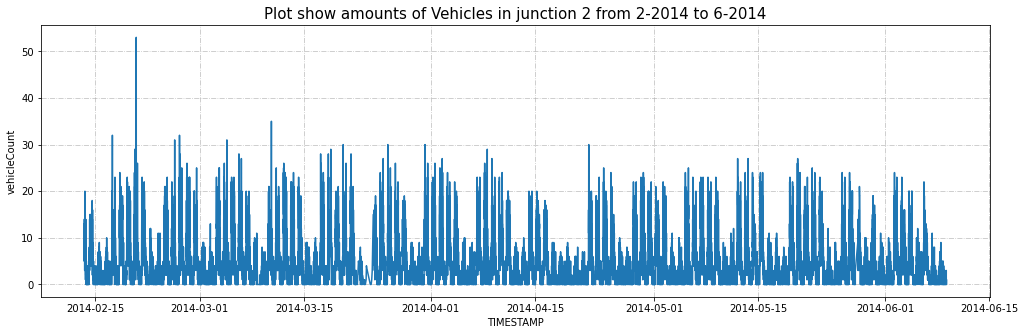

In [13]:
make_time_series_plot(extID=2)

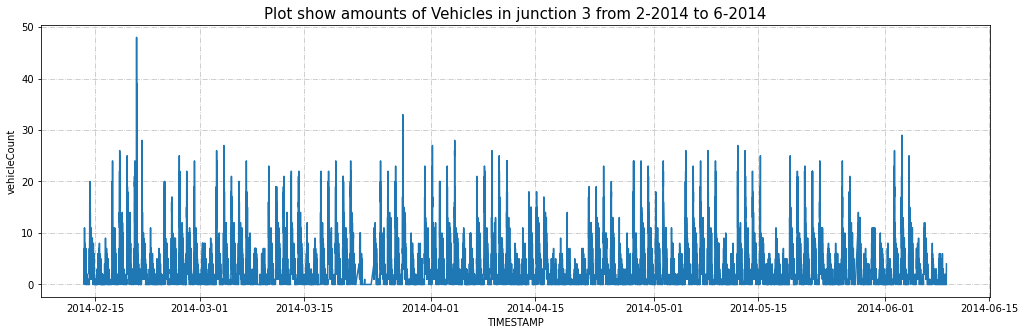

In [14]:
make_time_series_plot(extID=3)

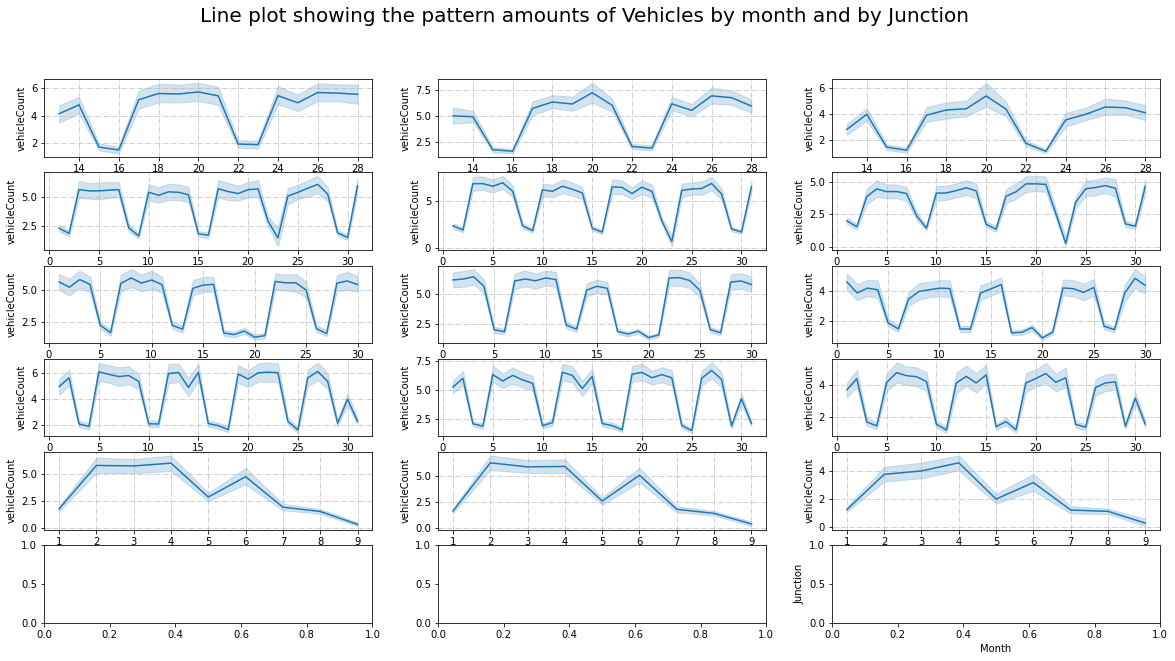

In [15]:
#Line plot

f, ax = plt.subplots(6, 3, figsize=(20, 10))

for i, month in enumerate(range(2, 7)):
    for j, junction in enumerate(range(1, 4)):
        sns.lineplot(data=df_final[(df_final.extID == junction) & (df_final.Month == month)], x='Day', y='vehicleCount', ax=ax[i, j])
        ax[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Month')
plt.ylabel('Junction')
f.suptitle('Line plot showing the pattern amounts of Vehicles by month and by Junction', fontsize=20)
plt.show()

In [16]:
#Preparing Data For Training
X = df_final[['extID','Year','Month','Day','Hour','weekday']]
y = df_final['vehicleCount']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#Training the Algorithm
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [19]:
# Evaluating the Algorithm
import numpy as np
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6682461417318641
Mean Squared Error: 6.525955992125153
Root Mean Squared Error: 2.554595074003932


In [20]:
print(X.head())
y.head()

                     extID  Year  Month  Day  Hour  weekday
TIMESTAMP                                                  
2014-02-13 11:30:00      1  2014      2   13    11        3
2014-02-13 11:35:00      1  2014      2   13    11        3
2014-02-13 11:40:00      1  2014      2   13    11        3
2014-02-13 11:45:00      1  2014      2   13    11        3
2014-02-13 11:50:00      1  2014      2   13    11        3


TIMESTAMP
2014-02-13 11:30:00    7
2014-02-13 11:35:00    5
2014-02-13 11:40:00    6
2014-02-13 11:45:00    3
2014-02-13 11:50:00    6
Name: vehicleCount, dtype: int64

In [21]:
#defining the RandomForestRegressor
m1=RandomForestRegressor()
  
m1.fit(X,y)
#testing
m1.predict([[1,2014, 2, 13, 11, 3]])

array([6.07094048])